# Initialize

## Initialization

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from timeit import default_timer as timer
from jupyterthemes import jtplot
jtplot.reset()

fig_dir = "figures/"
paper_fig_dir = "C:\\Users\\rtorre\\Dropbox\\Work\\04_Projects\\Git\\GitHub\\NormalizingFlows\\NormalizingFlows\\papers\\NFHD\\figures\\" 

## Useful functions

In [5]:
def build_data_from_runs(path,save_file_name,results="succeeded"):
    print("Processing path", path,"for",results,"runs.")
    runs_list=[[int(i.replace("run_","")),os.path.abspath(os.path.join(os.path.join(path,i),"results.txt"))] for i in os.listdir(path) if ("run" in i and os.path.isdir(os.path.abspath(os.path.join(path,i))))]
    runs_list.sort()
    if os.path.exists(runs_list[0][1]):
        data=pd.read_csv(runs_list[0][1])
        i=1
        j=0
    else:
        print("No results available for run",runs_list[0][1])
        data=pd.DataFrame()
        i=0
        j=0
    for run in runs_list[1:]:
        if os.path.exists(run[1]):
            tmp = pd.read_csv(run[1]).pop("time")
            if 'nan' in str(tmp) or "failed" in str(tmp):
                if results == "all":
                    data=pd.concat([data,pd.read_csv(run[1])])
                else:
                    pass
            else:
                data=pd.concat([data,pd.read_csv(run[1])])
            i=i+1
        else:
            j=j+1
            print("No results available for run",run[0])
    data = data.reset_index(drop=True).replace("failed","nan")
    print("Succesfully imported", i, "runs (failed to import",j,"runs).")
    save_path = os.path.abspath(os.path.join(path,save_file_name))
    data.to_csv(save_path,index=False)
    print("Succesfully saved data to file", save_path)
    return data

In [6]:
def extract_lines(df_bests,bij,corr,metric):
    result = []
    for df in df_bests:
        tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
        if tmp != []:
            result.append(tmp)
    return np.array(result)

# Results for extremely multimodal correlated mixture

## Check, fix, import results

### Check and fix results

In [7]:
hm_correlated_results_paths = {"MAFN": "CMoG_em/results/MAFN/",
                               "RealNVPN": "CMoG_em/results/RealNVPN/",
                               "MsplineN": "CMoG_em/results/MsplineN/",
                               "CsplineN": "CMoG_em/results/CsplineN/"
                              }

In [8]:
for res in hm_correlated_results_paths.values():
    build_data_from_runs(res,"log_file_eternal_final.txt")

Processing path CMoG_em/results/MAFN/ for succeeded runs.
Succesfully imported 8 runs (failed to import 0 runs).
Succesfully saved data to file C:\Users\rtorre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NormalizingFlowsHD-2\Riccardo\CMoG_em\results\MAFN\log_file_eternal_final.txt
Processing path CMoG_em/results/RealNVPN/ for succeeded runs.
Succesfully imported 8 runs (failed to import 0 runs).
Succesfully saved data to file C:\Users\rtorre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NormalizingFlowsHD-2\Riccardo\CMoG_em\results\RealNVPN\log_file_eternal_final.txt
Processing path CMoG_em/results/MsplineN/ for succeeded runs.
Succesfully imported 39 runs (failed to import 0 runs).
Succesfully saved data to file C:\Users\rtorre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NormalizingFlowsHD-2\Riccardo\CMoG_em\results\MsplineN\log_file_eternal_final.txt
Processing path CMoG_em/results/CsplineN/ for succeeded runs.
Succesfully imported 7 runs (failed to import 0 

### Import results

In [9]:
tmp_paths = {k: v+"log_file_eternal_final.txt" for k,v in hm_correlated_results_paths.items()}
tmp = {k: pd.read_csv(tmp_paths[k]) for k in tmp_paths.keys()}
try:
    for k in tmp.keys():
        tmp[k]["epochs_input"] = tmp[k]["epochs_input"].fillna(1000)
        tmp[k]["epochs_output"] = tmp[k]["epochs_output"].fillna(0)
except:
    pass
df_correlated_em = pd.concat([df for df in tmp.values()],ignore_index=True).dropna().reset_index(drop=True)
df_correlated_em = df_correlated_em[~(df_correlated_em == 'failed').any(axis=1)]
len(df_correlated_em)

61

In [10]:
tmp1 = df_correlated_em[df_correlated_em["spline_knots"]>13]
tmp2 = df_correlated_em[df_correlated_em["spline_knots"]<13][df_correlated_em["bijector"]=="MsplineN"][df_correlated_em["nbijectors"]>3]
tmp3 = df_correlated_em[df_correlated_em["spline_knots"]<13][df_correlated_em["bijector"]=="MsplineN"][df_correlated_em["nbijectors"]<3]
tmp4 = df_correlated_em[df_correlated_em["bijector"]!="MsplineN"]
tmp1["bijector"] = "MsplineN2"
tmp2["bijector"] = "MsplineN3"
df_correlated_em = pd.concat([tmp4,tmp3,tmp1,tmp2],ignore_index=True).reset_index(drop=True)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\1161126519.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp2 = df_correlated_em[df_correlated_em["spline_knots"]<13][df_correlated_em["bijector"]=="MsplineN"][df_correlated_em["nbijectors"]>3]
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\1161126519.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp3 = df_correlated_em[df_correlated_em["spline_knots"]<13][df_correlated_em["bijector"]=="MsplineN"][df_correlated_em["nbijectors"]<3]
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\1161126519.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp1["bijector"] = "MsplineN2"


In [11]:
df_correlated_em

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,...,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,1,0,4,100000,corr,5,MAFN,relu,8,-5,...,0.218352,0.219653,0.040102,0.040102,0.032415,128-128-128,512,1000,446,1105.740509
1,2,0,8,100000,corr,5,MAFN,relu,8,-5,...,0.222443,0.219314,0.045060,0.045060,0.059170,128-128-128,512,1000,368,917.257526
2,3,0,16,100000,corr,10,MAFN,relu,8,-5,...,0.201321,0.194731,0.046508,0.046508,0.123934,256-256-256,512,1000,142,694.922346
3,4,0,32,100000,corr,5,MAFN,relu,8,-5,...,0.211294,0.210782,0.039983,0.039983,0.299656,256-256-256,512,1000,261,670.836662
4,5,0,64,100000,corr,5,MAFN,relu,8,-5,...,0.168035,0.157308,0.129485,0.129485,2.272151,128-128-128,512,1000,482,1393.892515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,36,0,32,100000,corr,10,MsplineN3,relu,12,-16,...,0.181798,0.171648,0.085059,0.085059,0.606305,512-512-512,512,1000,79,2631.263618
57,37,0,64,100000,corr,10,MsplineN3,relu,12,-16,...,0.176437,0.163339,0.111461,0.111461,0.990220,512-512-512,512,1000,76,2602.692912
58,38,0,100,100000,corr,10,MsplineN3,relu,12,-16,...,0.152655,0.142512,0.134911,0.134911,2.762630,512-512-512,512,1000,79,2730.888694
59,39,0,200,100000,corr,10,MsplineN3,relu,12,-16,...,0.095749,0.096162,0.197057,0.197057,7.148852,512-512-512,512,1000,76,2901.920288


## Results for different dimensions

### 4D

In [12]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==4]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\1042314240.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,1,0,4,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.561140,0.542283,0.234840,0.231495,0.023163,0.023163,0.020802,128-128-128,512,1000,459,9105.691429
1,11,0,4,100000,corr,2,MsplineN2,relu,64,-16,0,None,-1,0.475854,0.485960,0.220528,0.215340,0.027561,0.027561,0.012370,512-512-512,512,1000,275,1471.526049
2,1,0,4,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.486355,0.485367,0.217722,0.218392,0.033409,0.033409,0.036450,256-256-256,512,1000,361,2041.842712
3,25,0,4,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.508622,0.497559,0.225178,0.223551,0.038030,0.038030,0.030742,128-128-128,512,1000,310,4642.202877
4,1,0,4,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.522563,0.551241,0.218352,0.219653,0.040102,0.040102,0.032415,128-128-128,512,1000,446,1105.740509
5,33,0,4,100000,corr,10,MsplineN3,relu,12,-16,0,None,-1,0.458668,0.457122,0.212386,0.211612,0.045987,0.045987,0.024829,512-512-512,512,1000,242,7713.131199
6,10,0,4,100000,corr,2,MsplineN2,relu,32,-16,0,None,-1,0.452750,0.466021,0.216696,0.207021,0.050102,0.050102,0.042763,512-512-512,512,1000,227,1213.986498
7,1,0,4,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.425549,0.413256,0.211556,0.209290,0.055433,0.055433,0.028149,128-128-128,256,1000,453,2502.214472


In [13]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_4D_corr_em_WD=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_4D_corr_em_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\3077192939.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\3077192939.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\3077192939.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\3077192939.py:6: UserWarning: Boo

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,1,0,4,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.561140,0.542283,0.234840,0.231495,0.023163,0.023163,0.020802,128-128-128,512,1000,459,9105.691429
1,11,0,4,100000,corr,2,MsplineN2,relu,64,-16,0,None,-1,0.475854,0.485960,0.220528,0.215340,0.027561,0.027561,0.012370,512-512-512,512,1000,275,1471.526049
2,1,0,4,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.486355,0.485367,0.217722,0.218392,0.033409,0.033409,0.036450,256-256-256,512,1000,361,2041.842712
3,25,0,4,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.508622,0.497559,0.225178,0.223551,0.038030,0.038030,0.030742,128-128-128,512,1000,310,4642.202877
4,1,0,4,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.522563,0.551241,0.218352,0.219653,0.040102,0.040102,0.032415,128-128-128,512,1000,446,1105.740509
7,1,0,4,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.425549,0.413256,0.211556,0.209290,0.055433,0.055433,0.028149,128-128-128,256,1000,453,2502.214472


In [14]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==4]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\96499780.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,1,0,4,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.522563,0.551241,0.218352,0.219653,0.040102,0.040102,0.032415,128-128-128,512,1000,446,1105.740509
1,1,0,4,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.561140,0.542283,0.234840,0.231495,0.023163,0.023163,0.020802,128-128-128,512,1000,459,9105.691429
2,25,0,4,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.508622,0.497559,0.225178,0.223551,0.038030,0.038030,0.030742,128-128-128,512,1000,310,4642.202877
3,11,0,4,100000,corr,2,MsplineN2,relu,64,-16,0,None,-1,0.475854,0.485960,0.220528,0.215340,0.027561,0.027561,0.012370,512-512-512,512,1000,275,1471.526049
4,1,0,4,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.486355,0.485367,0.217722,0.218392,0.033409,0.033409,0.036450,256-256-256,512,1000,361,2041.842712
5,10,0,4,100000,corr,2,MsplineN2,relu,32,-16,0,None,-1,0.452750,0.466021,0.216696,0.207021,0.050102,0.050102,0.042763,512-512-512,512,1000,227,1213.986498
6,33,0,4,100000,corr,10,MsplineN3,relu,12,-16,0,None,-1,0.458668,0.457122,0.212386,0.211612,0.045987,0.045987,0.024829,512-512-512,512,1000,242,7713.131199
7,1,0,4,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.425549,0.413256,0.211556,0.209290,0.055433,0.055433,0.028149,128-128-128,256,1000,453,2502.214472


In [15]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_4D_corr_em_KS=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_4D_corr_em_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\297585564.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\297585564.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\297585564.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\297585564.py:6: UserWarning: Boolean

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,1,0,4,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.522563,0.551241,0.218352,0.219653,0.040102,0.040102,0.032415,128-128-128,512,1000,446,1105.740509
1,1,0,4,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.561140,0.542283,0.234840,0.231495,0.023163,0.023163,0.020802,128-128-128,512,1000,459,9105.691429
2,25,0,4,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.508622,0.497559,0.225178,0.223551,0.038030,0.038030,0.030742,128-128-128,512,1000,310,4642.202877
3,11,0,4,100000,corr,2,MsplineN2,relu,64,-16,0,None,-1,0.475854,0.485960,0.220528,0.215340,0.027561,0.027561,0.012370,512-512-512,512,1000,275,1471.526049
4,1,0,4,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.486355,0.485367,0.217722,0.218392,0.033409,0.033409,0.036450,256-256-256,512,1000,361,2041.842712
7,1,0,4,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.425549,0.413256,0.211556,0.209290,0.055433,0.055433,0.028149,128-128-128,256,1000,453,2502.214472


### 8D

In [16]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==8]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\968631014.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,2,0,8,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.480955,0.467805,0.208231,0.208695,0.024873,0.024873,0.043700,128-128-128,512,1000,255,1426.234129
1,2,0,8,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.531627,0.526996,0.220652,0.222540,0.038320,0.038320,0.081097,128-128-128,512,1000,213,5151.855692
2,2,0,8,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.507483,0.523344,0.222443,0.219314,0.045060,0.045060,0.059170,128-128-128,512,1000,368,917.257526
3,2,0,8,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.443384,0.486838,0.216087,0.211967,0.046685,0.046685,0.038251,128-128-128,256,1000,288,1625.671634
4,13,0,8,100000,corr,2,MsplineN2,relu,64,-16,0,None,-1,0.438669,0.426511,0.213778,0.207133,0.055430,0.055430,0.082208,512-512-512,512,1000,127,701.707343
5,34,0,8,100000,corr,10,MsplineN3,relu,12,-16,0,None,-1,0.455115,0.454080,0.213292,0.211699,0.062320,0.062320,0.095262,512-512-512,512,1000,106,3405.864037
6,12,0,8,100000,corr,2,MsplineN2,relu,32,-16,0,None,-1,0.429382,0.437025,0.207854,0.199741,0.068067,0.068067,0.071723,512-512-512,512,1000,124,684.096298
7,26,0,8,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.459508,0.470595,0.208140,0.205225,0.078693,0.078693,0.073411,128-128-128,512,1000,181,2695.132288


In [17]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_8D_corr_em_WD=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_8D_corr_em_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2411383935.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2411383935.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2411383935.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2411383935.py:6: UserWarning: Boo

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,2,0,8,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.480955,0.467805,0.208231,0.208695,0.024873,0.024873,0.043700,128-128-128,512,1000,255,1426.234129
1,2,0,8,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.531627,0.526996,0.220652,0.222540,0.038320,0.038320,0.081097,128-128-128,512,1000,213,5151.855692
2,2,0,8,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.507483,0.523344,0.222443,0.219314,0.045060,0.045060,0.059170,128-128-128,512,1000,368,917.257526
3,2,0,8,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.443384,0.486838,0.216087,0.211967,0.046685,0.046685,0.038251,128-128-128,256,1000,288,1625.671634
4,13,0,8,100000,corr,2,MsplineN2,relu,64,-16,0,None,-1,0.438669,0.426511,0.213778,0.207133,0.055430,0.055430,0.082208,512-512-512,512,1000,127,701.707343
5,34,0,8,100000,corr,10,MsplineN3,relu,12,-16,0,None,-1,0.455115,0.454080,0.213292,0.211699,0.062320,0.062320,0.095262,512-512-512,512,1000,106,3405.864037


In [18]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==8]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\1117056521.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,2,0,8,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.531627,0.526996,0.220652,0.222540,0.038320,0.038320,0.081097,128-128-128,512,1000,213,5151.855692
1,2,0,8,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.507483,0.523344,0.222443,0.219314,0.045060,0.045060,0.059170,128-128-128,512,1000,368,917.257526
2,2,0,8,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.443384,0.486838,0.216087,0.211967,0.046685,0.046685,0.038251,128-128-128,256,1000,288,1625.671634
3,26,0,8,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.459508,0.470595,0.208140,0.205225,0.078693,0.078693,0.073411,128-128-128,512,1000,181,2695.132288
4,2,0,8,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.480955,0.467805,0.208231,0.208695,0.024873,0.024873,0.043700,128-128-128,512,1000,255,1426.234129
5,34,0,8,100000,corr,10,MsplineN3,relu,12,-16,0,None,-1,0.455115,0.454080,0.213292,0.211699,0.062320,0.062320,0.095262,512-512-512,512,1000,106,3405.864037
6,12,0,8,100000,corr,2,MsplineN2,relu,32,-16,0,None,-1,0.429382,0.437025,0.207854,0.199741,0.068067,0.068067,0.071723,512-512-512,512,1000,124,684.096298
7,13,0,8,100000,corr,2,MsplineN2,relu,64,-16,0,None,-1,0.438669,0.426511,0.213778,0.207133,0.055430,0.055430,0.082208,512-512-512,512,1000,127,701.707343


In [19]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_8D_corr_em_KS=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_8D_corr_em_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\1770025465.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\1770025465.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\1770025465.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\1770025465.py:6: UserWarning: Boo

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,2,0,8,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.531627,0.526996,0.220652,0.222540,0.038320,0.038320,0.081097,128-128-128,512,1000,213,5151.855692
1,2,0,8,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.507483,0.523344,0.222443,0.219314,0.045060,0.045060,0.059170,128-128-128,512,1000,368,917.257526
2,2,0,8,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.443384,0.486838,0.216087,0.211967,0.046685,0.046685,0.038251,128-128-128,256,1000,288,1625.671634
3,26,0,8,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.459508,0.470595,0.208140,0.205225,0.078693,0.078693,0.073411,128-128-128,512,1000,181,2695.132288
4,2,0,8,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.480955,0.467805,0.208231,0.208695,0.024873,0.024873,0.043700,128-128-128,512,1000,255,1426.234129
6,12,0,8,100000,corr,2,MsplineN2,relu,32,-16,0,None,-1,0.429382,0.437025,0.207854,0.199741,0.068067,0.068067,0.071723,512-512-512,512,1000,124,684.096298


### 16D

In [20]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==16]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\440931653.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,3,0,16,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.524506,0.521249,0.221467,0.221672,0.036611,0.036611,0.140591,128-128-128,512,1000,293,1590.974330
1,14,0,16,100000,corr,2,MsplineN2,relu,32,-16,0,None,-1,0.475425,0.477865,0.214571,0.213376,0.040393,0.040393,0.176895,512-512-512,512,1000,101,558.371593
2,3,0,16,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.374593,0.454479,0.201321,0.194731,0.046508,0.046508,0.123934,256-256-256,512,1000,142,694.922346
3,27,0,16,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.503593,0.517398,0.217600,0.216050,0.047726,0.047726,0.113841,128-128-128,512,1000,200,2944.782877
4,3,0,16,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.434243,0.446581,0.202019,0.198340,0.049933,0.049933,0.131362,128-128-128,256,1000,205,2154.553240
5,3,0,16,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.418971,0.419545,0.202241,0.199097,0.071082,0.071082,0.186917,128-128-128,512,1000,262,5525.410694
6,35,0,16,100000,corr,10,MsplineN3,relu,12,-16,0,None,-1,0.393521,0.396125,0.198925,0.194538,0.076571,0.076571,0.199127,512-512-512,512,1000,92,3055.046518
7,15,0,16,100000,corr,2,MsplineN2,relu,64,-16,0,None,-1,0.345110,0.364490,0.177873,0.175253,0.100269,0.100269,0.353041,512-512-512,512,1000,110,628.343044


In [21]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_16D_corr_em_WD=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_16D_corr_em_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\1228452676.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\1228452676.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\1228452676.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\1228452676.py:6: UserWarning: Boo

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,3,0,16,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.524506,0.521249,0.221467,0.221672,0.036611,0.036611,0.140591,128-128-128,512,1000,293,1590.974330
1,14,0,16,100000,corr,2,MsplineN2,relu,32,-16,0,None,-1,0.475425,0.477865,0.214571,0.213376,0.040393,0.040393,0.176895,512-512-512,512,1000,101,558.371593
2,3,0,16,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.374593,0.454479,0.201321,0.194731,0.046508,0.046508,0.123934,256-256-256,512,1000,142,694.922346
3,27,0,16,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.503593,0.517398,0.217600,0.216050,0.047726,0.047726,0.113841,128-128-128,512,1000,200,2944.782877
4,3,0,16,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.434243,0.446581,0.202019,0.198340,0.049933,0.049933,0.131362,128-128-128,256,1000,205,2154.553240
5,3,0,16,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.418971,0.419545,0.202241,0.199097,0.071082,0.071082,0.186917,128-128-128,512,1000,262,5525.410694


In [22]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==16]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2514538099.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,3,0,16,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.524506,0.521249,0.221467,0.221672,0.036611,0.036611,0.140591,128-128-128,512,1000,293,1590.974330
1,27,0,16,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.503593,0.517398,0.217600,0.216050,0.047726,0.047726,0.113841,128-128-128,512,1000,200,2944.782877
2,14,0,16,100000,corr,2,MsplineN2,relu,32,-16,0,None,-1,0.475425,0.477865,0.214571,0.213376,0.040393,0.040393,0.176895,512-512-512,512,1000,101,558.371593
3,3,0,16,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.374593,0.454479,0.201321,0.194731,0.046508,0.046508,0.123934,256-256-256,512,1000,142,694.922346
4,3,0,16,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.434243,0.446581,0.202019,0.198340,0.049933,0.049933,0.131362,128-128-128,256,1000,205,2154.553240
5,3,0,16,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.418971,0.419545,0.202241,0.199097,0.071082,0.071082,0.186917,128-128-128,512,1000,262,5525.410694
6,35,0,16,100000,corr,10,MsplineN3,relu,12,-16,0,None,-1,0.393521,0.396125,0.198925,0.194538,0.076571,0.076571,0.199127,512-512-512,512,1000,92,3055.046518
7,15,0,16,100000,corr,2,MsplineN2,relu,64,-16,0,None,-1,0.345110,0.364490,0.177873,0.175253,0.100269,0.100269,0.353041,512-512-512,512,1000,110,628.343044


In [23]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_16D_corr_em_KS=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_16D_corr_em_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\1786860791.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\1786860791.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\1786860791.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\1786860791.py:6: UserWarning: Boo

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,3,0,16,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.524506,0.521249,0.221467,0.221672,0.036611,0.036611,0.140591,128-128-128,512,1000,293,1590.974330
1,27,0,16,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.503593,0.517398,0.217600,0.216050,0.047726,0.047726,0.113841,128-128-128,512,1000,200,2944.782877
2,14,0,16,100000,corr,2,MsplineN2,relu,32,-16,0,None,-1,0.475425,0.477865,0.214571,0.213376,0.040393,0.040393,0.176895,512-512-512,512,1000,101,558.371593
3,3,0,16,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.374593,0.454479,0.201321,0.194731,0.046508,0.046508,0.123934,256-256-256,512,1000,142,694.922346
4,3,0,16,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.434243,0.446581,0.202019,0.198340,0.049933,0.049933,0.131362,128-128-128,256,1000,205,2154.553240
5,3,0,16,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.418971,0.419545,0.202241,0.199097,0.071082,0.071082,0.186917,128-128-128,512,1000,262,5525.410694


### 32D

In [24]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==32]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\586887061.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,28,0,32,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.480353,0.488350,0.213112,0.212893,0.039534,0.039534,0.256123,128-128-128,512,1000,202,3076.124507
1,4,0,32,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.465464,0.469478,0.211294,0.210782,0.039983,0.039983,0.299656,256-256-256,512,1000,261,670.836662
2,4,0,32,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.494280,0.489159,0.212402,0.214132,0.040272,0.040272,0.252646,128-128-128,512,1000,301,1648.927552
3,17,0,32,100000,corr,2,MsplineN2,relu,64,-16,0,None,-1,0.449805,0.461176,0.210399,0.205080,0.045043,0.045043,0.251863,512-512-512,512,1000,110,642.067365
4,16,0,32,100000,corr,2,MsplineN2,relu,32,-16,0,None,-1,0.397612,0.424460,0.200264,0.193584,0.061958,0.061958,0.581352,512-512-512,512,1000,104,584.857172
5,4,0,32,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.342799,0.339954,0.181669,0.179162,0.078999,0.078999,0.505634,128-128-128,256,1000,272,1473.134515
6,36,0,32,100000,corr,10,MsplineN3,relu,12,-16,0,None,-1,0.325382,0.327041,0.181798,0.171648,0.085059,0.085059,0.606305,512-512-512,512,1000,79,2631.263618
7,4,0,32,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.332989,0.352205,0.182003,0.178207,0.087504,0.087504,0.518220,128-128-128,512,1000,163,4456.541214


In [25]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_32D_corr_em_WD=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_32D_corr_em_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\3153382575.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\3153382575.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\3153382575.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\3153382575.py:6: UserWarning: Boo

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,28,0,32,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.480353,0.488350,0.213112,0.212893,0.039534,0.039534,0.256123,128-128-128,512,1000,202,3076.124507
1,4,0,32,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.465464,0.469478,0.211294,0.210782,0.039983,0.039983,0.299656,256-256-256,512,1000,261,670.836662
2,4,0,32,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.494280,0.489159,0.212402,0.214132,0.040272,0.040272,0.252646,128-128-128,512,1000,301,1648.927552
3,17,0,32,100000,corr,2,MsplineN2,relu,64,-16,0,None,-1,0.449805,0.461176,0.210399,0.205080,0.045043,0.045043,0.251863,512-512-512,512,1000,110,642.067365
5,4,0,32,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.342799,0.339954,0.181669,0.179162,0.078999,0.078999,0.505634,128-128-128,256,1000,272,1473.134515
7,4,0,32,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.332989,0.352205,0.182003,0.178207,0.087504,0.087504,0.518220,128-128-128,512,1000,163,4456.541214


In [26]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==32]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\1364262207.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,4,0,32,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.494280,0.489159,0.212402,0.214132,0.040272,0.040272,0.252646,128-128-128,512,1000,301,1648.927552
1,28,0,32,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.480353,0.488350,0.213112,0.212893,0.039534,0.039534,0.256123,128-128-128,512,1000,202,3076.124507
2,4,0,32,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.465464,0.469478,0.211294,0.210782,0.039983,0.039983,0.299656,256-256-256,512,1000,261,670.836662
3,17,0,32,100000,corr,2,MsplineN2,relu,64,-16,0,None,-1,0.449805,0.461176,0.210399,0.205080,0.045043,0.045043,0.251863,512-512-512,512,1000,110,642.067365
4,16,0,32,100000,corr,2,MsplineN2,relu,32,-16,0,None,-1,0.397612,0.424460,0.200264,0.193584,0.061958,0.061958,0.581352,512-512-512,512,1000,104,584.857172
5,4,0,32,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.332989,0.352205,0.182003,0.178207,0.087504,0.087504,0.518220,128-128-128,512,1000,163,4456.541214
6,4,0,32,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.342799,0.339954,0.181669,0.179162,0.078999,0.078999,0.505634,128-128-128,256,1000,272,1473.134515
7,36,0,32,100000,corr,10,MsplineN3,relu,12,-16,0,None,-1,0.325382,0.327041,0.181798,0.171648,0.085059,0.085059,0.606305,512-512-512,512,1000,79,2631.263618


In [27]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_32D_corr_em_KS=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_32D_corr_em_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2975018925.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2975018925.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2975018925.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2975018925.py:6: UserWarning: Boo

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,4,0,32,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.494280,0.489159,0.212402,0.214132,0.040272,0.040272,0.252646,128-128-128,512,1000,301,1648.927552
1,28,0,32,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.480353,0.488350,0.213112,0.212893,0.039534,0.039534,0.256123,128-128-128,512,1000,202,3076.124507
2,4,0,32,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.465464,0.469478,0.211294,0.210782,0.039983,0.039983,0.299656,256-256-256,512,1000,261,670.836662
3,17,0,32,100000,corr,2,MsplineN2,relu,64,-16,0,None,-1,0.449805,0.461176,0.210399,0.205080,0.045043,0.045043,0.251863,512-512-512,512,1000,110,642.067365
5,4,0,32,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.332989,0.352205,0.182003,0.178207,0.087504,0.087504,0.518220,128-128-128,512,1000,163,4456.541214
6,4,0,32,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.342799,0.339954,0.181669,0.179162,0.078999,0.078999,0.505634,128-128-128,256,1000,272,1473.134515


### 64D

In [28]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==64]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2130924201.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,5,0,64,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.413712,0.437837,0.206023,0.199989,0.051260,0.051260,0.716028,128-128-128,256,1000,369,2070.720904
1,19,0,64,100000,corr,2,MsplineN2,relu,64,-16,0,None,-1,0.422494,0.460494,0.211722,0.195293,0.059587,0.059587,0.991733,512-512-512,512,1000,116,797.004065
2,18,0,64,100000,corr,2,MsplineN2,relu,32,-16,0,None,-1,0.416130,0.442214,0.212648,0.198472,0.070161,0.070161,0.859884,512-512-512,512,1000,108,632.798041
3,29,0,64,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.426407,0.422141,0.199107,0.198640,0.073210,0.073210,0.787161,128-128-128,512,1000,173,2659.351234
4,5,0,64,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.353747,0.372708,0.191862,0.182021,0.092259,0.092259,1.479366,128-128-128,512,1000,485,14009.970567
5,5,0,64,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.329158,0.344945,0.178105,0.171918,0.099112,0.099112,1.170876,128-128-128,512,1000,227,1675.731898
6,37,0,64,100000,corr,10,MsplineN3,relu,12,-16,0,None,-1,0.309994,0.323873,0.176437,0.163339,0.111461,0.111461,0.990220,512-512-512,512,1000,76,2602.692912
7,5,0,64,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.296148,0.304239,0.168035,0.157308,0.129485,0.129485,2.272151,128-128-128,512,1000,482,1393.892515


In [29]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_64D_corr_em_WD=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_64D_corr_em_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2484465694.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2484465694.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2484465694.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2484465694.py:6: UserWarning: Boo

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,5,0,64,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.413712,0.437837,0.206023,0.199989,0.051260,0.051260,0.716028,128-128-128,256,1000,369,2070.720904
1,19,0,64,100000,corr,2,MsplineN2,relu,64,-16,0,None,-1,0.422494,0.460494,0.211722,0.195293,0.059587,0.059587,0.991733,512-512-512,512,1000,116,797.004065
3,29,0,64,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.426407,0.422141,0.199107,0.198640,0.073210,0.073210,0.787161,128-128-128,512,1000,173,2659.351234
4,5,0,64,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.353747,0.372708,0.191862,0.182021,0.092259,0.092259,1.479366,128-128-128,512,1000,485,14009.970567
5,5,0,64,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.329158,0.344945,0.178105,0.171918,0.099112,0.099112,1.170876,128-128-128,512,1000,227,1675.731898
7,5,0,64,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.296148,0.304239,0.168035,0.157308,0.129485,0.129485,2.272151,128-128-128,512,1000,482,1393.892515


In [30]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==64]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\295721066.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,19,0,64,100000,corr,2,MsplineN2,relu,64,-16,0,None,-1,0.422494,0.460494,0.211722,0.195293,0.059587,0.059587,0.991733,512-512-512,512,1000,116,797.004065
1,18,0,64,100000,corr,2,MsplineN2,relu,32,-16,0,None,-1,0.416130,0.442214,0.212648,0.198472,0.070161,0.070161,0.859884,512-512-512,512,1000,108,632.798041
2,5,0,64,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.413712,0.437837,0.206023,0.199989,0.051260,0.051260,0.716028,128-128-128,256,1000,369,2070.720904
3,29,0,64,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.426407,0.422141,0.199107,0.198640,0.073210,0.073210,0.787161,128-128-128,512,1000,173,2659.351234
4,5,0,64,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.353747,0.372708,0.191862,0.182021,0.092259,0.092259,1.479366,128-128-128,512,1000,485,14009.970567
5,5,0,64,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.329158,0.344945,0.178105,0.171918,0.099112,0.099112,1.170876,128-128-128,512,1000,227,1675.731898
6,37,0,64,100000,corr,10,MsplineN3,relu,12,-16,0,None,-1,0.309994,0.323873,0.176437,0.163339,0.111461,0.111461,0.990220,512-512-512,512,1000,76,2602.692912
7,5,0,64,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.296148,0.304239,0.168035,0.157308,0.129485,0.129485,2.272151,128-128-128,512,1000,482,1393.892515


In [31]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_64D_corr_em_KS=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_64D_corr_em_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\3522270729.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\3522270729.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\3522270729.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\3522270729.py:6: UserWarning: Boo

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,19,0,64,100000,corr,2,MsplineN2,relu,64,-16,0,None,-1,0.422494,0.460494,0.211722,0.195293,0.059587,0.059587,0.991733,512-512-512,512,1000,116,797.004065
2,5,0,64,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.413712,0.437837,0.206023,0.199989,0.051260,0.051260,0.716028,128-128-128,256,1000,369,2070.720904
3,29,0,64,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.426407,0.422141,0.199107,0.198640,0.073210,0.073210,0.787161,128-128-128,512,1000,173,2659.351234
4,5,0,64,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.353747,0.372708,0.191862,0.182021,0.092259,0.092259,1.479366,128-128-128,512,1000,485,14009.970567
5,5,0,64,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.329158,0.344945,0.178105,0.171918,0.099112,0.099112,1.170876,128-128-128,512,1000,227,1675.731898
7,5,0,64,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.296148,0.304239,0.168035,0.157308,0.129485,0.129485,2.272151,128-128-128,512,1000,482,1393.892515


### 100D

In [32]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==100]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\3888321720.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,30,0,100,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.479058,0.483996,0.216443,0.214361,0.043642,0.043642,1.017099,128-128-128,512,1000,193,2981.474866
1,20,0,100,100000,corr,2,MsplineN2,relu,32,-16,0,None,-1,0.388307,0.405108,0.197770,0.189128,0.052574,0.052574,0.999838,512-512-512,512,1000,95,637.509488
2,6,0,100,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.402658,0.407291,0.195425,0.194557,0.073222,0.073222,1.393931,256-256-256,512,1000,193,1118.009442
3,21,0,100,100000,corr,2,MsplineN2,relu,64,-16,0,None,-1,0.305166,0.313190,0.168948,0.162628,0.096262,0.096262,2.450132,512-512-512,512,1000,92,734.459189
4,6,0,100,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.334328,0.354297,0.182069,0.173617,0.096450,0.096450,1.784979,256-256-256,512,1000,166,833.911114
5,38,0,100,100000,corr,10,MsplineN3,relu,12,-16,0,None,-1,0.255056,0.264985,0.152655,0.142512,0.134911,0.134911,2.762630,512-512-512,512,1000,79,2730.888694
6,6,0,100,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.128024,0.096026,0.083764,0.089872,0.207666,0.207666,4.836724,128-128-128,256,1000,383,1990.314948
7,6,0,100,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.123745,0.085958,0.065525,0.083728,0.216770,0.216770,4.107913,512-512-512,512,1000,144,3435.583235


In [33]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_100D_corr_em_WD=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_100D_corr_em_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\3158703236.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\3158703236.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\3158703236.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\3158703236.py:6: UserWarning: Boo

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,30,0,100,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.479058,0.483996,0.216443,0.214361,0.043642,0.043642,1.017099,128-128-128,512,1000,193,2981.474866
1,20,0,100,100000,corr,2,MsplineN2,relu,32,-16,0,None,-1,0.388307,0.405108,0.197770,0.189128,0.052574,0.052574,0.999838,512-512-512,512,1000,95,637.509488
2,6,0,100,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.402658,0.407291,0.195425,0.194557,0.073222,0.073222,1.393931,256-256-256,512,1000,193,1118.009442
4,6,0,100,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.334328,0.354297,0.182069,0.173617,0.096450,0.096450,1.784979,256-256-256,512,1000,166,833.911114
6,6,0,100,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.128024,0.096026,0.083764,0.089872,0.207666,0.207666,4.836724,128-128-128,256,1000,383,1990.314948
7,6,0,100,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.123745,0.085958,0.065525,0.083728,0.216770,0.216770,4.107913,512-512-512,512,1000,144,3435.583235


In [34]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==100]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2565553297.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,30,0,100,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.479058,0.483996,0.216443,0.214361,0.043642,0.043642,1.017099,128-128-128,512,1000,193,2981.474866
1,6,0,100,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.402658,0.407291,0.195425,0.194557,0.073222,0.073222,1.393931,256-256-256,512,1000,193,1118.009442
2,20,0,100,100000,corr,2,MsplineN2,relu,32,-16,0,None,-1,0.388307,0.405108,0.197770,0.189128,0.052574,0.052574,0.999838,512-512-512,512,1000,95,637.509488
3,6,0,100,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.334328,0.354297,0.182069,0.173617,0.096450,0.096450,1.784979,256-256-256,512,1000,166,833.911114
4,21,0,100,100000,corr,2,MsplineN2,relu,64,-16,0,None,-1,0.305166,0.313190,0.168948,0.162628,0.096262,0.096262,2.450132,512-512-512,512,1000,92,734.459189
5,38,0,100,100000,corr,10,MsplineN3,relu,12,-16,0,None,-1,0.255056,0.264985,0.152655,0.142512,0.134911,0.134911,2.762630,512-512-512,512,1000,79,2730.888694
6,6,0,100,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.128024,0.096026,0.083764,0.089872,0.207666,0.207666,4.836724,128-128-128,256,1000,383,1990.314948
7,6,0,100,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.123745,0.085958,0.065525,0.083728,0.216770,0.216770,4.107913,512-512-512,512,1000,144,3435.583235


In [35]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_100D_corr_em_KS=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_100D_corr_em_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2604150211.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2604150211.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2604150211.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2604150211.py:6: UserWarning: Boo

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,30,0,100,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.479058,0.483996,0.216443,0.214361,0.043642,0.043642,1.017099,128-128-128,512,1000,193,2981.474866
1,6,0,100,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.402658,0.407291,0.195425,0.194557,0.073222,0.073222,1.393931,256-256-256,512,1000,193,1118.009442
2,20,0,100,100000,corr,2,MsplineN2,relu,32,-16,0,None,-1,0.388307,0.405108,0.197770,0.189128,0.052574,0.052574,0.999838,512-512-512,512,1000,95,637.509488
3,6,0,100,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.334328,0.354297,0.182069,0.173617,0.096450,0.096450,1.784979,256-256-256,512,1000,166,833.911114
6,6,0,100,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.128024,0.096026,0.083764,0.089872,0.207666,0.207666,4.836724,128-128-128,256,1000,383,1990.314948
7,6,0,100,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.123745,0.085958,0.065525,0.083728,0.216770,0.216770,4.107913,512-512-512,512,1000,144,3435.583235


### 200D

In [36]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==200]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\3751871177.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,23,0,200,100000,corr,2,MsplineN2,relu,64,-16,0,None,-1,0.342373,0.353391,0.183333,0.176072,0.089347,0.089347,5.095035,512-512-512,512,1000,102,1342.103733
1,22,0,200,100000,corr,2,MsplineN2,relu,32,-16,0,None,-1,0.272265,0.277535,0.155177,0.146307,0.131046,0.131046,5.675439,512-512-512,512,1000,98,835.626326
2,31,0,200,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.262913,0.258128,0.155149,0.149227,0.141884,0.141884,6.714460,128-128-128,512,1000,191,2990.937485
3,7,0,200,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.187589,0.169114,0.121357,0.120260,0.153851,0.153851,6.322726,256-256-256,256,1000,221,2351.886128
4,7,0,200,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.230659,0.229484,0.132985,0.131042,0.155262,0.155262,5.908238,128-128-128,512,1000,492,1348.293905
5,7,0,200,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.149268,0.134332,0.084922,0.094461,0.189823,0.189823,11.581888,128-128-128,512,1000,849,5030.020869
6,39,0,200,100000,corr,10,MsplineN3,relu,12,-16,0,None,-1,0.150528,0.130592,0.095749,0.096162,0.197057,0.197057,7.148852,512-512-512,512,1000,76,2901.920288


In [37]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_200D_corr_em_WD=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_200D_corr_em_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2844171006.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2844171006.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2844171006.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2844171006.py:6: UserWarning: Boo

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,23,0,200,100000,corr,2,MsplineN2,relu,64,-16,0,None,-1,0.342373,0.353391,0.183333,0.176072,0.089347,0.089347,5.095035,512-512-512,512,1000,102,1342.103733
2,31,0,200,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.262913,0.258128,0.155149,0.149227,0.141884,0.141884,6.714460,128-128-128,512,1000,191,2990.937485
3,7,0,200,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.187589,0.169114,0.121357,0.120260,0.153851,0.153851,6.322726,256-256-256,256,1000,221,2351.886128
4,7,0,200,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.230659,0.229484,0.132985,0.131042,0.155262,0.155262,5.908238,128-128-128,512,1000,492,1348.293905
5,7,0,200,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.149268,0.134332,0.084922,0.094461,0.189823,0.189823,11.581888,128-128-128,512,1000,849,5030.020869


In [38]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==200]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\3360229692.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,23,0,200,100000,corr,2,MsplineN2,relu,64,-16,0,None,-1,0.342373,0.353391,0.183333,0.176072,0.089347,0.089347,5.095035,512-512-512,512,1000,102,1342.103733
1,22,0,200,100000,corr,2,MsplineN2,relu,32,-16,0,None,-1,0.272265,0.277535,0.155177,0.146307,0.131046,0.131046,5.675439,512-512-512,512,1000,98,835.626326
2,31,0,200,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.262913,0.258128,0.155149,0.149227,0.141884,0.141884,6.714460,128-128-128,512,1000,191,2990.937485
3,7,0,200,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.230659,0.229484,0.132985,0.131042,0.155262,0.155262,5.908238,128-128-128,512,1000,492,1348.293905
4,7,0,200,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.187589,0.169114,0.121357,0.120260,0.153851,0.153851,6.322726,256-256-256,256,1000,221,2351.886128
5,7,0,200,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.149268,0.134332,0.084922,0.094461,0.189823,0.189823,11.581888,128-128-128,512,1000,849,5030.020869
6,39,0,200,100000,corr,10,MsplineN3,relu,12,-16,0,None,-1,0.150528,0.130592,0.095749,0.096162,0.197057,0.197057,7.148852,512-512-512,512,1000,76,2901.920288


In [39]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_200D_corr_em_KS=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_200D_corr_em_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2352572650.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2352572650.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2352572650.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\2352572650.py:6: UserWarning: Boo

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,23,0,200,100000,corr,2,MsplineN2,relu,64,-16,0,None,-1,0.342373,0.353391,0.183333,0.176072,0.089347,0.089347,5.095035,512-512-512,512,1000,102,1342.103733
2,31,0,200,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.262913,0.258128,0.155149,0.149227,0.141884,0.141884,6.714460,128-128-128,512,1000,191,2990.937485
3,7,0,200,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.230659,0.229484,0.132985,0.131042,0.155262,0.155262,5.908238,128-128-128,512,1000,492,1348.293905
4,7,0,200,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.187589,0.169114,0.121357,0.120260,0.153851,0.153851,6.322726,256-256-256,256,1000,221,2351.886128
5,7,0,200,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.149268,0.134332,0.084922,0.094461,0.189823,0.189823,11.581888,128-128-128,512,1000,849,5030.020869


### 400D

In [40]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==400]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\1338689738.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,8,0,400,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.283174,0.288970,0.161508,0.155796,0.117558,0.117558,11.326471,128-128-128,512,1000,460,1287.736711
1,24,0,400,100000,corr,2,MsplineN2,relu,32,-16,0,None,-1,0.129955,0.110910,0.087016,0.090246,0.189889,0.189889,21.713190,512-512-512,512,1000,116,1654.489687
2,8,0,400,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.130470,0.103659,0.083115,0.089507,0.196646,0.196646,14.599180,256-256-256,256,1000,152,1640.706445
3,40,0,400,100000,corr,10,MsplineN3,relu,12,-16,0,None,-1,0.115807,0.092618,0.067348,0.074811,0.219614,0.219614,16.203641,512-512-512,512,1000,82,4740.841193
4,8,0,400,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.057183,0.024054,0.028506,0.046533,0.263319,0.263319,24.871901,128-128-128,512,1000,701,4781.352155
5,32,0,400,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.038752,0.018153,0.015591,0.029041,0.325683,0.325683,20.956544,128-128-128,512,1000,217,5140.668985


In [41]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_400D_corr_em_WD=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_400D_corr_em_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\332182019.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\332182019.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\332182019.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\332182019.py:6: UserWarning: Boolean

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,8,0,400,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.283174,0.288970,0.161508,0.155796,0.117558,0.117558,11.326471,128-128-128,512,1000,460,1287.736711
1,24,0,400,100000,corr,2,MsplineN2,relu,32,-16,0,None,-1,0.129955,0.110910,0.087016,0.090246,0.189889,0.189889,21.713190,512-512-512,512,1000,116,1654.489687
2,8,0,400,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.130470,0.103659,0.083115,0.089507,0.196646,0.196646,14.599180,256-256-256,256,1000,152,1640.706445
3,40,0,400,100000,corr,10,MsplineN3,relu,12,-16,0,None,-1,0.115807,0.092618,0.067348,0.074811,0.219614,0.219614,16.203641,512-512-512,512,1000,82,4740.841193
4,8,0,400,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.057183,0.024054,0.028506,0.046533,0.263319,0.263319,24.871901,128-128-128,512,1000,701,4781.352155


In [42]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==400]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\1030135457.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,8,0,400,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.283174,0.288970,0.161508,0.155796,0.117558,0.117558,11.326471,128-128-128,512,1000,460,1287.736711
1,24,0,400,100000,corr,2,MsplineN2,relu,32,-16,0,None,-1,0.129955,0.110910,0.087016,0.090246,0.189889,0.189889,21.713190,512-512-512,512,1000,116,1654.489687
2,8,0,400,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.130470,0.103659,0.083115,0.089507,0.196646,0.196646,14.599180,256-256-256,256,1000,152,1640.706445
3,40,0,400,100000,corr,10,MsplineN3,relu,12,-16,0,None,-1,0.115807,0.092618,0.067348,0.074811,0.219614,0.219614,16.203641,512-512-512,512,1000,82,4740.841193
4,8,0,400,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.057183,0.024054,0.028506,0.046533,0.263319,0.263319,24.871901,128-128-128,512,1000,701,4781.352155
5,32,0,400,100000,corr,5,MsplineN3,relu,12,-16,0,None,-1,0.038752,0.018153,0.015591,0.029041,0.325683,0.325683,20.956544,128-128-128,512,1000,217,5140.668985


In [43]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_400D_corr_em_KS=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_400D_corr_em_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\1460216196.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\1460216196.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\1460216196.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_26528\1460216196.py:6: UserWarning: Boo

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,8,0,400,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.283174,0.288970,0.161508,0.155796,0.117558,0.117558,11.326471,128-128-128,512,1000,460,1287.736711
1,24,0,400,100000,corr,2,MsplineN2,relu,32,-16,0,None,-1,0.129955,0.110910,0.087016,0.090246,0.189889,0.189889,21.713190,512-512-512,512,1000,116,1654.489687
2,8,0,400,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.130470,0.103659,0.083115,0.089507,0.196646,0.196646,14.599180,256-256-256,256,1000,152,1640.706445
3,40,0,400,100000,corr,10,MsplineN3,relu,12,-16,0,None,-1,0.115807,0.092618,0.067348,0.074811,0.219614,0.219614,16.203641,512-512-512,512,1000,82,4740.841193
4,8,0,400,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.057183,0.024054,0.028506,0.046533,0.263319,0.263319,24.871901,128-128-128,512,1000,701,4781.352155


## Best models

In [44]:
df_bests_corr_em = [df_best_4D_corr_em_WD,df_best_8D_corr_em_WD,df_best_16D_corr_em_WD,df_best_32D_corr_em_WD,df_best_64D_corr_em_WD,df_best_100D_corr_em_WD,df_best_200D_corr_em_WD,df_best_400D_corr_em_WD]

In [45]:
tmp=pd.concat(df_bests_corr_em)
tmp2=tmp[tmp["bijector"]=="MsplineN3"]
tmp2[tmp2["correlation"]=="corr"]

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,...,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
3,25,0,4,100000,corr,5,MsplineN3,relu,12,-16,...,0.225178,0.223551,0.038030,0.038030,0.030742,128-128-128,512,1000,310,4642.202877
5,34,0,8,100000,corr,10,MsplineN3,relu,12,-16,...,0.213292,0.211699,0.062320,0.062320,0.095262,512-512-512,512,1000,106,3405.864037
3,27,0,16,100000,corr,5,MsplineN3,relu,12,-16,...,0.217600,0.216050,0.047726,0.047726,0.113841,128-128-128,512,1000,200,2944.782877
0,28,0,32,100000,corr,5,MsplineN3,relu,12,-16,...,0.213112,0.212893,0.039534,0.039534,0.256123,128-128-128,512,1000,202,3076.124507
3,29,0,64,100000,corr,5,MsplineN3,relu,12,-16,...,0.199107,0.198640,0.073210,0.073210,0.787161,128-128-128,512,1000,173,2659.351234
0,30,0,100,100000,corr,5,MsplineN3,relu,12,-16,...,0.216443,0.214361,0.043642,0.043642,1.017099,128-128-128,512,1000,193,2981.474866
2,31,0,200,100000,corr,5,MsplineN3,relu,12,-16,...,0.155149,0.149227,0.141884,0.141884,6.714460,128-128-128,512,1000,191,2990.937485
3,40,0,400,100000,corr,10,MsplineN3,relu,12,-16,...,0.067348,0.074811,0.219614,0.219614,16.203641,512-512-512,512,1000,82,4740.841193


In [46]:
df_bests_corr_em = [df[df["bijector"]!="MsplineN3"] for df in df_bests_corr_em]

## Plots

### Wasserstein distance

In [47]:
MsplineN_corr_em_WD = extract_lines(df_bests_corr_em,"MsplineN","corr","Wasserstein_median")
MsplineN2_corr_em_WD = extract_lines(df_bests_corr_em,"MsplineN2","corr","Wasserstein_median")
MsplineN3_corr_em_WD = extract_lines(df_bests_corr_em,"MsplineN3","corr","Wasserstein_median")
CsplineN_corr_em_WD = extract_lines(df_bests_corr_em,"CsplineN","corr","Wasserstein_median")
MAFN_corr_em_WD = extract_lines(df_bests_corr_em,"MAFN","corr","Wasserstein_median")
RealNVPN_corr_em_WD = extract_lines(df_bests_corr_em,"RealNVPN","corr","Wasserstein_median")

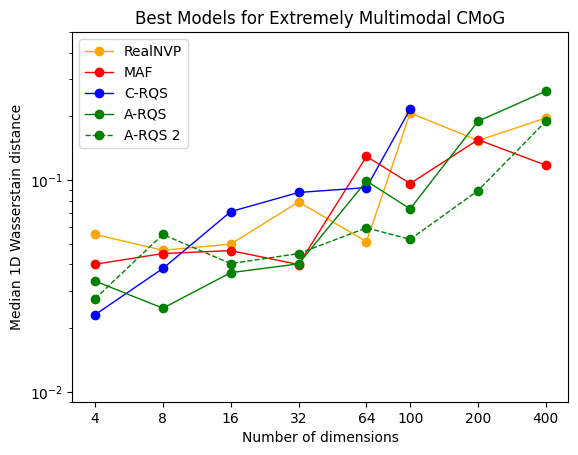

In [51]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_corr_em_WD[:,0],RealNVPN_corr_em_WD[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_corr_em_WD[:,0],MAFN_corr_em_WD[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_corr_em_WD[:,0],CsplineN_corr_em_WD[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_corr_em_WD[:,0],MsplineN_corr_em_WD[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN2_corr_em_WD[:,0],MsplineN2_corr_em_WD[:,1],point_marker, color='green', label='A-RQS 2', linestyle="--", linewidth=linewidth)
#plt.plot(MsplineN3_corr_em_WD[:,0],MsplineN3_corr_em_WD[:,1],point_marker, color='green', label='A-RQS 3', linestyle=":", linewidth=linewidth)
if labels:
    for i in MsplineN_corr_WD:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in MsplineN2_corr_WD:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
 #   for i in MsplineN3_corr_WD:
 #       plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_WD:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_WD:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_WD:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('Median 1D Wasserstain distance')
plt.ylim(0.009,0.5)
plt.title("Best Models for Extremely Multimodal CMoG")
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100,200,400], ['4','8','16','32','64','100','200','400'])
plt.savefig(paper_fig_dir + 'Best_WD_median_corr_em.pdf')
plt.show()
plt.close()

### KS

In [52]:
MsplineN_corr_em_KS = extract_lines(df_bests_corr_em,"MsplineN","corr","ks_test_median")
MsplineN2_corr_em_KS = extract_lines(df_bests_corr_em,"MsplineN2","corr","ks_test_median")
MsplineN3_corr_em_KS = extract_lines(df_bests_corr_em,"MsplineN3","corr","ks_test_median")
CsplineN_corr_em_KS = extract_lines(df_bests_corr_em,"CsplineN","corr","ks_test_median")
MAFN_corr_em_KS = extract_lines(df_bests_corr_em,"MAFN","corr","ks_test_median")
RealNVPN_corr_em_KS = extract_lines(df_bests_corr_em,"RealNVPN","corr","ks_test_median")

In [70]:
#KS_threshold=0.000000001
#MsplineN_corr_KS = np.array([x for x in MsplineN_corr_KS if x[1]>KS_threshold])
#MsplineN_uncorr_KS = np.array([x for x in MsplineN_uncorr_KS if x[1]>KS_threshold])
#CsplineN_corr_KS = np.array([x for x in CsplineN_corr_KS if x[1]>KS_threshold])
#CsplineN_uncorr_KS = np.array([x for x in CsplineN_uncorr_KS if x[1]>KS_threshold])
#MAFN_corr_KS = np.array([x for x in MAFN_corr_KS if x[1]>KS_threshold])
#MAFN_uncorr_KS = np.array([x for x in MAFN_uncorr_KS if x[1]>KS_threshold])
#RealNVPN_corr_KS = np.array([x for x in RealNVPN_corr_KS if x[1]>KS_threshold])
#RealNVPN_uncorr_KS = np.array([x for x in RealNVPN_uncorr_KS if x[1]>KS_threshold])

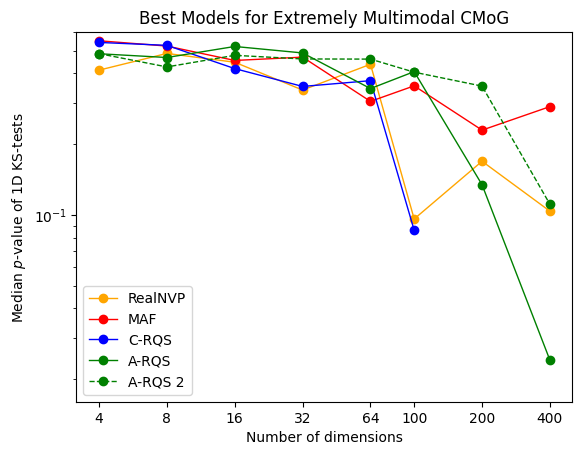

In [55]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_corr_em_KS[:,0],RealNVPN_corr_em_KS[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_corr_em_KS[:,0],MAFN_corr_em_KS[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_corr_em_KS[:,0],CsplineN_corr_em_KS[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_corr_em_KS[:,0],MsplineN_corr_em_KS[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN2_corr_em_KS[:,0],MsplineN2_corr_em_KS[:,1],point_marker, color='green', label='A-RQS 2', linestyle="--", linewidth=linewidth)
#plt.plot(MsplineN3_corr_em_KS[:,0],MsplineN3_corr_em_KS[:,1],point_marker, color='green', label='A-RQS 3', linestyle=":", linewidth=linewidth)
if labels:
    for i in MsplineN_corr_KS:
        plt.text(i[0]*0.85,i[1]*1, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in MsplineN2_corr_KS:
        plt.text(i[0]*0.85,i[1]*1, str(int(i[2])), fontsize=point_label_size, color='green')
 #   for i in MsplineN3_corr_KS:
 #       plt.text(i[0]*0.85,i[1]*1, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_KS:
        plt.text(i[0]*1.05,i[1]*0.98, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_KS:
        plt.text(i[0]*1.05,i[1]*1.01, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_KS:
        plt.text(i[0]*0.85,i[1]*0.98, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('Median $p$-value of 1D KS-tests')
plt.ylim(0.016,0.6)
plt.title("Best Models for Extremely Multimodal CMoG")
#lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100,200,400], ['4','8','16','32','64','100','200','400'])
plt.savefig(paper_fig_dir + 'Best_KS_median_corr_em.pdf')
plt.show()
plt.close()

### Frobenius-norm

In [57]:
MsplineN_corr_em_FN = extract_lines(df_bests_corr_em,"MsplineN","corr","frob_norm")
MsplineN2_corr_em_FN = extract_lines(df_bests_corr_em,"MsplineN2","corr","frob_norm")
MsplineN3_corr_em_FN = extract_lines(df_bests_corr_em,"MsplineN3","corr","frob_norm")
CsplineN_corr_em_FN = extract_lines(df_bests_corr_em,"CsplineN","corr","frob_norm")
MAFN_corr_em_FN = extract_lines(df_bests_corr_em,"MAFN","corr","frob_norm")
RealNVPN_corr_em_FN = extract_lines(df_bests_corr_em,"RealNVPN","corr","frob_norm")

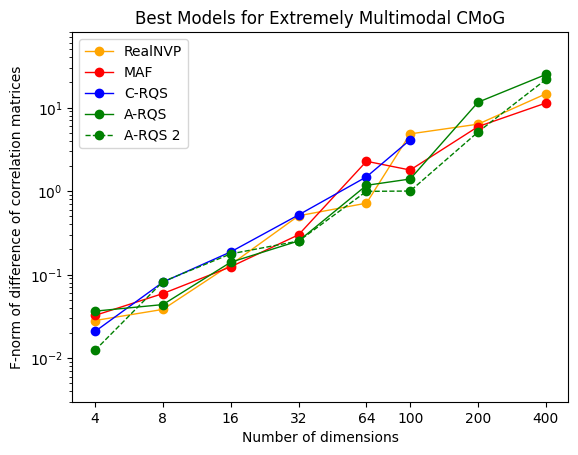

In [58]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_corr_em_FN[:,0],RealNVPN_corr_em_FN[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_corr_em_FN[:,0],MAFN_corr_em_FN[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_corr_em_FN[:,0],CsplineN_corr_em_FN[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_corr_em_FN[:,0],MsplineN_corr_em_FN[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN2_corr_em_FN[:,0],MsplineN2_corr_em_FN[:,1],point_marker, color='green', label='A-RQS 2', linestyle="--", linewidth=linewidth)
#plt.plot(MsplineN3_corr_em_FN[:,0],MsplineN3_corr_em_FN[:,1],point_marker, color='green', label='A-RQS 3', linestyle=":", linewidth=linewidth)
if labels:
    for i in MsplineN_corr_FN:
        plt.text(i[0]*0.85,i[1]*1, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in MsplineN2_corr_FN:
        plt.text(i[0]*0.85,i[1]*1, str(int(i[2])), fontsize=point_label_size, color='green')
  #  for i in MsplineN3_corr_FN:
  #      plt.text(i[0]*0.85,i[1]*1, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_FN:
        plt.text(i[0]*1.05,i[1]*1.03, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_FN:
        plt.text(i[0]*1.05,i[1]*0.8, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_FN:
        plt.text(i[0]*0.85,i[1]*0.75, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('F-norm of difference of correlation matrices')
plt.ylim(0.003,80)
plt.title("Best Models for Extremely Multimodal CMoG")
#lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100,200,400], ['4','8','16','32','64','100','200','400'])
plt.savefig(paper_fig_dir + 'Best_FN_corr_em.pdf')
plt.show()
plt.close()

### Training time

In [61]:
MsplineN_corr_em_time = extract_lines(df_bests_corr_em,"MsplineN","corr","time").astype(np.float)
MsplineN2_corr_em_time = extract_lines(df_bests_corr_em,"MsplineN2","corr","time").astype(np.float)
MsplineN3_corr_em_time = extract_lines(df_bests_corr_em,"MsplineN3","corr","time").astype(np.float)
CsplineN_corr_em_time = extract_lines(df_bests_corr_em,"CsplineN","corr","time").astype(np.float)
MAFN_corr_em_time = extract_lines(df_bests_corr_em,"MAFN","corr","time").astype(np.float)
RealNVPN_corr_em_time = extract_lines(df_bests_corr_em,"RealNVPN","corr","time").astype(np.float)

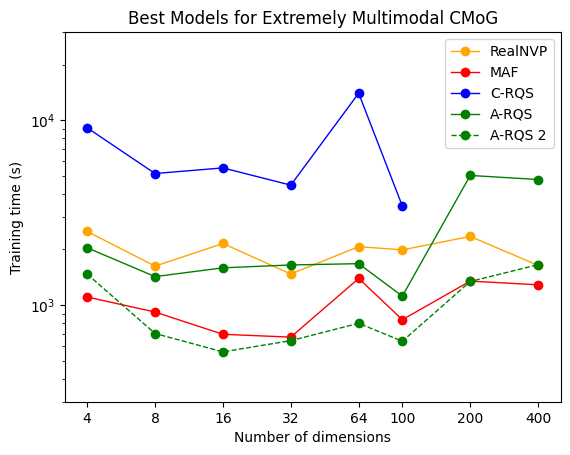

In [63]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_corr_em_time[:,0],RealNVPN_corr_em_time[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_corr_em_time[:,0],MAFN_corr_em_time[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_corr_em_time[:,0],CsplineN_corr_em_time[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_corr_em_time[:,0],MsplineN_corr_em_time[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN2_corr_em_time[:,0],MsplineN2_corr_em_time[:,1],point_marker, color='green', label='A-RQS 2', linestyle="--", linewidth=linewidth)
#plt.plot(MsplineN3_corr_em_time[:,0],MsplineN3_corr_em_time[:,1],point_marker, color='green', label='A-RQS 3', linestyle=":", linewidth=linewidth)
if labels:
    for i in MsplineN_corr_time:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in MsplineN2_corr_time:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
 #   for i in MsplineN3_corr_time:
 #       plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_time:
        plt.text(i[0]*1.05,i[1]*1.03, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_time:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_time:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('Training time (s)')
plt.ylim(300,30000)
plt.title("Best Models for Extremely Multimodal CMoG")
#lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100,200,400], ['4','8','16','32','64','100','200','400'])
plt.savefig(paper_fig_dir + 'Best_training_time_corr_em.pdf')
plt.show()
plt.close()

## Tables

In [84]:
tmp=df_bests_corr_em[7]
print(tmp["ndims"].iloc[0])
tmp=tmp[tmp["correlation"]=="corr"]
tmp=tmp[["hidden_layers","nbijectors","bijector","spline_knots","batch_size","Wasserstein_median", "ks_test_median", "frob_norm","epochs_output","time"]]
tmp["Wasserstein_median"]=tmp["Wasserstein_median"].apply(lambda x: "{:.2e}".format(float(x)))
tmp["ks_test_median"]=tmp["ks_test_median"].apply(lambda x: "{:.2e}".format(float(x)))
tmp["frob_norm"]=tmp["frob_norm"].apply(lambda x: "{:.2e}".format(float(x)))
tmp["time"]=tmp["time"].apply(lambda x: int(float(x)))
string=tmp.to_latex()
print(string)

400
\begin{tabular}{llrlrrlllrr}
\toprule
{} & hidden\_layers &  nbijectors &   bijector &  spline\_knots &  batch\_size & Wasserstein\_median & ks\_test\_median & frob\_norm &  epochs\_output &  time \\
\midrule
0 &   128-128-128 &           5 &       MAFN &             8 &         512 &           1.18e-01 &       2.89e-01 &  1.13e+01 &            460 &  1287 \\
1 &   512-512-512 &           2 &  MsplineN2 &            32 &         512 &           1.90e-01 &       1.11e-01 &  2.17e+01 &            116 &  1654 \\
2 &   256-256-256 &          10 &   RealNVPN &             8 &         256 &           1.97e-01 &       1.04e-01 &  1.46e+01 &            152 &  1640 \\
4 &   128-128-128 &           2 &   MsplineN &             8 &         512 &           2.63e-01 &       2.41e-02 &  2.49e+01 &            701 &  4781 \\
\bottomrule
\end{tabular}



C:\Users\rtorre\AppData\Local\Temp\ipykernel_10544\1585590179.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  string=tmp.to_latex()
